In this tutorial, we cover the `pyphs.Evaluation` object for the numerical evaluation of `pyphs.Core` objects. The core PHS object associated with the Thiele-Small modeling of electrodynamic loudspeakers is used as an example.

<!-- TEASER_END -->

The [example](https://github.com/pyphs/pyphs/tree/master/pyphs/examples/thielesmall) can be found in the PyPHS examples at `\pyphs\examples\` and the script [`evaluation.py`](https://github.com/pyphs/pyphs/tree/master/pyphs/examples/thielesmall) corresponding to this notebook can be found in the PyPHS tutorials at `\pyphs\tutorials\`.

# Description

The `pyphs.Evaluation` object build the numerical functions associated with the symbolic expressions of a `pyphs.Core`. This is not a dynamical object, so it has to be rebuild if the core is changed in any way.

# Retrieve the pyphs.Core from the Thiele-Small example

In [1]:
from pyphs.examples.thielesmall.thielesmall import core

Read netlist thielesmall.net
from folder /Users/afalaize/Developement/repos/pyphs/pyphs/examples/thielesmall/
pass "#=======================  INPUTS  ========================#"
read "electronics.source      IN  ('A', '#'):             type=voltage;"
pass "#"
pass "#=====================  ELECTRONICS  =====================#"
read "electronics.resistor    R   ('A', 'B'):             R=('R', 5.9);"
read "electronics.inductor    L   ('B', 'C'):             L=('L', 2.36*1e-3);"
pass "#"
pass "#======================  CONNECTOR  ======================#"
read "connectors.transformer  T   ('C', '#', 'D', '#'):   alpha=('Bl', 16.37);"
pass "#"
pass "#======================  MECHANICS  ======================#"
read "mechanics.mass          M   ('D',):                 M=('M', 0.075);"
read "mechanics.stiffness     K   ('D', '#'):             K=('K', 1e4);"
read "mechanics.damper        A   ('D', '#'):             A=('A', 10.);"
pass ""
Build graph IN...
Build graph R...
Build graph L...
Build gra

The structure is

In [2]:
core.pprint()

⎡                                                ⎡1.0⋅K⋅xK⎤⎤
⎢                                                ⎢        ⎥⎥
⎢⎡dtxK⎤  ⎡ 0     0      -1.0     0    0     0 ⎤  ⎢ 1.0⋅xL ⎥⎥
⎢⎢    ⎥  ⎢                                    ⎥  ⎢ ────── ⎥⎥
⎢⎢dtxL⎥  ⎢ 0     0     -1.0⋅Bl   0   -1.0  1.0⎥  ⎢   L    ⎥⎥
⎢⎢    ⎥  ⎢                                    ⎥  ⎢        ⎥⎥
⎢⎢dtxM⎥  ⎢1.0  1.0⋅Bl     0     1.0   0     0 ⎥  ⎢ 1.0⋅xM ⎥⎥
⎢⎢    ⎥, ⎢                                    ⎥, ⎢ ────── ⎥⎥
⎢⎢ wA ⎥  ⎢ 0     0      -1.0     0    0     0 ⎥  ⎢   M    ⎥⎥
⎢⎢    ⎥  ⎢                                    ⎥  ⎢        ⎥⎥
⎢⎢ wR ⎥  ⎢ 0    1.0       0      0    0     0 ⎥  ⎢  A⋅wA  ⎥⎥
⎢⎢    ⎥  ⎢                                    ⎥  ⎢        ⎥⎥
⎢⎣yIN ⎦  ⎣ 0    -1.0      0      0    0     0 ⎦  ⎢  R⋅wR  ⎥⎥
⎢                                                ⎢        ⎥⎥
⎣                                                ⎣  uIN   ⎦⎦


with the state

In [3]:
core.x

the dissipation variable

In [4]:
core.w

the storage function (Hamiltonian)

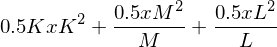

In [5]:
core.H

the dissipation function

In [6]:
core.z

and the parameters

In [7]:
core.subs

# Build Evaluation object

The evaluation object is build with

In [8]:
evals = core.to_evaluation(names=['H', 'dxH', 'z', 'M', 'Jxx'], vectorize=True)

Build numerical evaluations...


Notice the symbols associated with entries in the substitution dictionary `core.subs` are automatically replaced by their correponding value in `core.subs`.

The parameters are

* **`names`:  list of strings or 'all' (optional).** List of core's arguments names associated with the functions that
    will be lambdified. If 'all', the names for every arguments,
    every functions (including all systems matrices and sub-matrices),
    and every operations are considered (processing time increases
    quickly with original core's complexity if thsi option is used).
* **`vectorize`: bool (optional).** If True, every functions are vectorized with numpy.vectorize.
    The default is True.   

# Arguments

The arguments of numerical functions are taken from the vector 
$$\mathbf{args} \triangleq (\mathbf x, \, \delta \mathbf x, \, \mathbf w, \, \mathbf u, \, \mathbf p, \, \mathbf o)$$
from the original `Core`:

In [9]:
evals.args()

Below we define a set of numerical values for these arguments

In [10]:
x = [5e-4, 2e-2]
dx = [5e-3, 2e-1]
w = [5e-3, ]
u = [1.5, ]

args = x + dx + w + u

# Call to Functions
For each function that has been built at initialization, `Evaluation` contains 

1. a list `Evaluation.funcname_args` of symbols for arguments, 
2. a list `Evaluation.funcname_inds` of corresponding indices in $\mathbf{args}$,
3. a numerical function `Evaluation.funcname` with arguments defined by the list (1),

where `funcname` has to be changed to appropriate funcion name.

As a example, we evaluate below the Hamiltonian

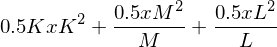

In [11]:
core.H

which reads after substitution

In [12]:
evals.core.H

The arguments are

In [13]:
evals.H_args

and correspond to the following entries in $\mathbf{args}$

In [14]:
evals.H_inds

i.e. the numerical values for the arguments are

In [15]:
x1, x2, x3 = [args[i] for i in evals.H_inds]
x1, x2, x3

Thus, the function for the evaluation of the Hamiltonian takes three argmuents. 
It is called with

In [16]:
evals.H(x1, x2, x3)

array(0.08616242937853107)

or directly

In [17]:
x_vec = x1, x2, x3
evals.H(*x_vec)

array(0.08616242937853107)

Also notice the case with no arguments, e.g.

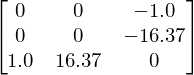

In [18]:
evals.core.Jxx()

In [19]:
print(evals.Jxx_args, evals.Jxx_inds)

() ()


In [20]:
evals.Jxx()

array([[  0.  ,   0.  ,  -1.  ],
       [  0.  ,   0.  , -16.37],
       [  1.  ,  16.37,   0.  ]])

# Vectorize
If the option `vectorize=True` has been passed to the initialization of the `Evaluation` object, each argument of function can be a vector of values. Below, we define vectors of random values

In [21]:
import numpy as np
N = 5
x1_vec = np.random.rand(N)*1e-3
x2_vec = np.random.rand(N)*1e-3
x3_vec = np.random.rand(N)*1e-3

and call the function with these vectors:

In [22]:
evals.H(x1_vec, x3_vec, x3_vec)

array([  4.44981238e-03,   1.38762645e-04,   9.45259727e-06,
         2.62797091e-04,   5.10995136e-04])